In [ ]:
#from keras.datasets import boston_housing
#(x_train,y_train),(x_test,y_test)=boston_housing.load_data()

In [58]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import normalize
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
data=load_boston()

In [60]:
x=normalize(data.data,axis=0)
(x_train,x_test,y_train,y_test)=train_test_split(x,data.target,test_size=0.15)
m=x_train.shape[0]
x_train.shape

(430, 13)

In [61]:
y_train=y_train.reshape(430,1)
y_test=y_test.reshape(76,1)
y_train

array([[22. ],
       [13.4],
       [50. ],
       [24.7],
       [31.5],
       [13.8],
       [ 8.1],
       [23.9],
       [32.9],
       [ 9.6],
       [29. ],
       [19.9],
       [29.6],
       [12.7],
       [50. ],
       [32.2],
       [ 7. ],
       [10.8],
       [37.9],
       [48.3],
       [19.9],
       [20. ],
       [11.8],
       [13.3],
       [19.9],
       [16.6],
       [28.1],
       [19.4],
       [21.4],
       [21.1],
       [ 8.5],
       [22.6],
       [12.5],
       [11.7],
       [22. ],
       [ 6.3],
       [46. ],
       [20.6],
       [37.6],
       [18.7],
       [14.1],
       [19.1],
       [23.7],
       [21.7],
       [17. ],
       [12.3],
       [50. ],
       [28.7],
       [22. ],
       [16.8],
       [13.3],
       [23.8],
       [37.3],
       [25. ],
       [ 9.5],
       [ 9.7],
       [14.9],
       [21.2],
       [19.7],
       [41.7],
       [23.7],
       [23.8],
       [13.4],
       [24. ],
       [19.6],
       [20.1],
       [13

In [62]:
temp=np.append(x_train,y_train).reshape(m,x_train.shape[1]+1)
df=pd.DataFrame(temp)
vis=df.corr()
vis.style.background_gradient()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,0.842345,0.874168,0.870741,0.853048,0.883302,0.7949,0.848026,0.899402,0.91777,0.854383,0.870307,0.805812,0.883038
1,0.842345,1,0.828354,0.829202,0.863822,0.819241,0.736058,0.815081,0.777985,0.810914,0.83559,0.86952,0.794323,0.914294
2,0.874168,0.828354,1,0.894028,0.908826,0.874716,0.75478,0.787242,0.859173,0.843946,0.877893,0.852595,0.793525,0.897583
3,0.870741,0.829202,0.894028,1,0.881658,0.898577,0.798796,0.831453,0.846578,0.854085,0.90918,0.873865,0.801493,0.877505
4,0.853048,0.863822,0.908826,0.881658,1,0.891233,0.773179,0.837995,0.843708,0.874402,0.884381,0.89036,0.824198,0.876392
5,0.883302,0.819241,0.874716,0.898577,0.891233,1,0.861766,0.838714,0.889144,0.847555,0.883991,0.871879,0.820333,0.869882
6,0.7949,0.736058,0.75478,0.798796,0.773179,0.861766,1,0.79324,0.876256,0.772168,0.82903,0.849865,0.842089,0.811656
7,0.848026,0.815081,0.787242,0.831453,0.837995,0.838714,0.79324,1,0.796706,0.802229,0.843023,0.840131,0.839004,0.821611
8,0.899402,0.777985,0.859173,0.846578,0.843708,0.889144,0.876256,0.796706,1,0.872249,0.874644,0.857687,0.799689,0.83686
9,0.91777,0.810914,0.843946,0.854085,0.874402,0.847555,0.772168,0.802229,0.872249,1,0.821503,0.886248,0.770106,0.838503


In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
reg=LinearRegression().fit(x_train,y_train)

In [65]:
print(reg.coef_)
print(reg.intercept_)

[[ -24.99959487   27.50989216   -4.27030598   21.31830394 -220.87960101
   512.37520331    9.55493358 -152.95864391   92.72025685 -129.54932583
  -418.12184503   66.54456433 -176.4566361 ]]
[39.6947234]


In [66]:
acc_train=reg.score(x_train,y_train)
acc_train

0.7452822040671694

In [67]:
acc_test=reg.score(x_test,y_test)
acc_test

0.6968761264762675

In [68]:
reg.predict(x_train)

array([[27.86048889],
       [13.46139213],
       [43.83787182],
       [24.42049286],
       [32.89460855],
       [20.1848079 ],
       [ 3.19185597],
       [24.86524949],
       [30.34948757],
       [14.79518091],
       [31.72602807],
       [19.33736328],
       [25.25652344],
       [11.55748829],
       [43.25859609],
       [31.39329991],
       [-4.28135439],
       [11.60054161],
       [34.4585596 ],
       [37.22074319],
       [19.96133664],
       [22.66966067],
       [ 9.10347567],
       [20.0264693 ],
       [17.74078218],
       [18.11360764],
       [25.10768788],
       [17.85757265],
       [25.10557157],
       [22.40011345],
       [ 6.98565841],
       [22.59196097],
       [19.21000602],
       [15.00656694],
       [20.89420374],
       [10.71098266],
       [41.44353868],
       [16.10273971],
       [37.80749193],
       [21.61825448],
       [17.42698708],
       [24.57986005],
       [10.86411668],
       [25.05309722],
       [23.68602044],
       [13

In [69]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

In [70]:
model=Sequential()

model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
"""model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))"""
model.add(Dense(1,activation="relu"))

In [71]:
opt=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mse',
              optimizer=opt)

In [74]:
model.fit(x_train,y_train,epochs=50,batch_size=64,shuffle=True,validation_data=(x_test,y_test))

Train on 430 samples, validate on 76 samples
Epoch 1/50
430/430 [==============================] - 0s 100us/step - loss: 18.5927 - val_loss: 22.5742
Epoch 2/50
430/430 [==============================] - 0s 140us/step - loss: 19.4887 - val_loss: 22.6630
Epoch 3/50
430/430 [==============================] - 0s 116us/step - loss: 20.2122 - val_loss: 23.5738
Epoch 4/50
430/430 [==============================] - 0s 107us/step - loss: 19.6803 - val_loss: 22.2715
Epoch 5/50
430/430 [==============================] - 0s 102us/step - loss: 19.1835 - val_loss: 22.5456
Epoch 6/50
430/430 [==============================] - 0s 112us/step - loss: 20.6975 - val_loss: 24.9060
Epoch 7/50
430/430 [==============================] - 0s 112us/step - loss: 20.3919 - val_loss: 22.2202
Epoch 8/50
430/430 [==============================] - 0s 100us/step - loss: 20.9467 - val_loss: 24.8317
Epoch 9/50
430/430 [==============================] - 0s 119us/step - loss: 18.6402 - val_loss: 21.6592
Epoch 10/50
430/430

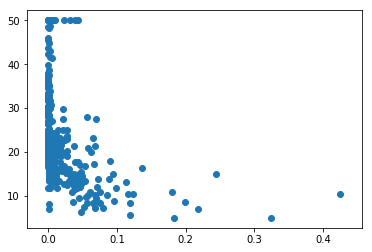

In [75]:
plt.scatter(x_train[:,0],y_train)

In [76]:
#import statsmodels.api as sm

In [77]:
#model = sm.OLS(y_train, x_train).fit()

In [82]:
predictions = model.predict(x_test)
predictions

array([[ 8.199049 ],
       [28.355167 ],
       [20.340445 ],
       [37.318756 ],
       [22.919643 ],
       [25.378296 ],
       [37.662262 ],
       [26.238941 ],
       [16.498596 ],
       [18.39774  ],
       [17.960388 ],
       [48.72171  ],
       [18.086344 ],
       [26.357916 ],
       [18.343536 ],
       [ 9.160569 ],
       [26.567923 ],
       [ 6.610343 ],
       [21.507483 ],
       [10.162633 ],
       [28.582453 ],
       [24.924015 ],
       [23.918732 ],
       [17.113464 ],
       [26.823288 ],
       [12.227395 ],
       [14.613128 ],
       [26.016548 ],
       [21.526066 ],
       [22.099627 ],
       [24.089888 ],
       [29.88227  ],
       [15.668815 ],
       [48.54076  ],
       [36.244846 ],
       [23.369154 ],
       [18.884176 ],
       [18.932144 ],
       [37.15024  ],
       [21.568882 ],
       [21.592289 ],
       [22.453644 ],
       [23.870361 ],
       [33.20745  ],
       [37.72465  ],
       [16.07838  ],
       [12.2519655],
       [27.38

In [83]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 67,841
Trainable params: 67,841
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.evaluate(x_test,y_test)

76/76 [==============================] - 0s 158us/step


21.532946285448578

Text(0,0.5,'Prediction')

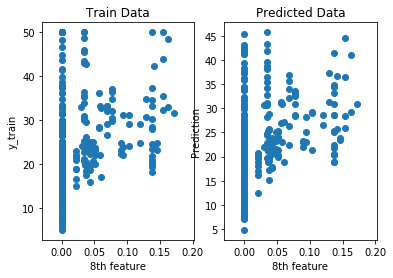

In [57]:
#i=input("Enter feature no. to analysis with Y : ")
plt.subplot(1,2,1)
plt.scatter(x_train[:,1],y_train)
plt.title("Train Data")
plt.xlabel(str(8)+"th feature")
plt.ylabel("y_train")

plt.subplot(1,2,2)
plt.scatter(x_train[:,1],predictions)
plt.title("Predicted Data")
plt.xlabel(str(8)+"th feature")
plt.ylabel("Prediction")